# Recommendation engine using correlation

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
#reading the data
#the data consist of more than 40000 products rated by more than 70 lacs customers

amazon_data = pd.read_csv("ratings/ratings_Electronics (1).csv", names=["UserID","ProductID","Ratings","Timestamp"])
amazon_data.head(10)

,UserID,ProductID,Ratings,Timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
5,A1QGNMC6O1VW39,0511189877,5.0,1397433600
6,A3J3BRHTDRFJ2G,0511189877,2.0,1397433600
7,A2TY0BTJOTENPG,0511189877,5.0,1395878400
8,A34ATBPOK6HCHY,0511189877,5.0,1395532800
9,A89DO69P0XZ27,0511189877,5.0,1395446400


In [5]:
(len(amazon_data["ProductID"].unique()))

476002

In [17]:
Most_rated = pd.DataFrame(amazon_data.groupby("ProductID")["Ratings"].count())
Most_rated = Most_rated.sort_values(by="Ratings",ascending=False)
Most_rated

,Ratings
ProductID,
B0074BW614,18244
B00DR0PDNE,16454
B007WTAJTO,14172
B0019EHU8G,12285
B006GWO5WK,12226
...,...
B004WL91KI,1
B004WL9FK4,1
B004WL9Q2Q,1


In [18]:
Most_rated.rename(columns={"Ratings":"Num Ratings"},inplace=True)
Most_rated["Ratings"] = pd.DataFrame(amazon_data.groupby("ProductID")["Ratings"].mean())
Most_rated.head()

,Num Ratings,Ratings
ProductID,,
B0074BW614,18244,4.491504
B00DR0PDNE,16454,3.931020
B007WTAJTO,14172,4.424005
B0019EHU8G,12285,4.754497
B006GWO5WK,12226,4.314657


In [21]:
products = [x for x in Most_rated["Num Ratings"].nlargest(5000).index]
products

['B0074BW614',
 'B00DR0PDNE',
 'B007WTAJTO',
 'B0019EHU8G',
 'B006GWO5WK',
 'B003ELYQGG',
 'B003ES5ZUU',
 'B007R5YDYA',
 'B00622AG6S',
 'B0002L5R78',
 'B008OHNZI0',
 'B003LR7ME6',
 'B000LRMS66',
 'B009SYZ8OC',
 'B00BGA9WK2',
 'B004QK7HI8',
 'B009A5204K',
 'B00BGGDVOO',
 'B0098F5W0Q',
 'B002MAPRYU',
 'B002WE6D44',
 'B005HMKKH4',
 'B0012S4APK',
 'B0052YFYFK',
 'B0001FTVEK',
 'B0044YU60M',
 'B00316263Y',
 'B000I68BD4',
 'B006ZP8UOW',
 'B0041Q38NU',
 'B005DOK8NW',
 'B002V88HFE',
 'B0027VT6V4',
 'B000S5Q9CA',
 'B009LL9VDG',
 'B003DZ165W',
 'B005FYNSPK',
 'B004GF8TIK',
 'B0015AARJI',
 'B001XURP7W',
 'B000VX6XL6',
 'B000BQ7GW8',
 'B0053NBLFW',
 'B007IV7KRU',
 'B0087NZ31S',
 'B004G6002M',
 'B005DKZTMG',
 'B0088LYCZC',
 'B007B31IAK',
 'B005X1Y7I2',
 'B000QUUFRW',
 'B004XC6GJ0',
 'B004OB0EBQ',
 'B003ZUIHY8',
 'B006OBGEHW',
 'B0057OCDQS',
 'B009USAJCC',
 'B0062IPIPQ',
 'B00BT7RAPG',
 'B00825BZUY',
 'B0038W0K2K',
 'B008AST7R6',
 'B006W8U2MU',
 'B007I5JT4S',
 'B007P4VOWC',
 'B004HHICKC',
 'B002QEBM

In [22]:
filt = amazon_data["ProductID"].isin(products)

In [23]:
df = amazon_data.loc[filt]
df = df.iloc[:100000,:]
df.tail()


,UserID,ProductID,Ratings,Timestamp
284227,AJ3LDEL1V0B2M,B00009R6TA,5.0,1386201600
284228,A1J5EUQ76R4J25,B00009R6TA,5.0,1355011200
284229,AR8G4574LK9F4,B00009R6TA,5.0,1125100800
284230,A1CRIXA0TUUN36,B00009R6TA,5.0,1308960000
284231,A3G9CN6OMRQKJA,B00009R6TA,5.0,1155686400


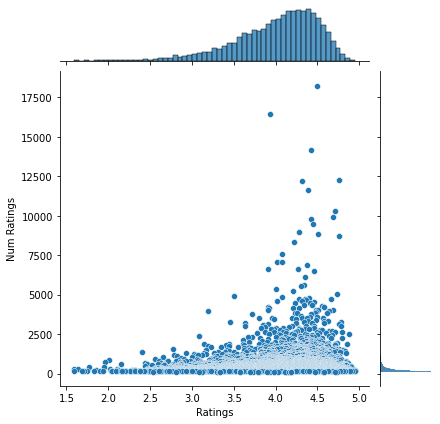

In [40]:
sns.jointplot(x="Ratings" ,y="Num Ratings" ,data=Most_rated.iloc[:10000,:])

In [24]:
pv = df.pivot_table(values="Ratings" ,index="UserID" ,columns="ProductID" ,fill_value=0)
pv.head()

ProductID,0972683275,1400501466,1400532655,140053271X,B00000DM9W,B00000J061,B00000J1V5,B00000JDF5,B00000JI4F,B00000K135,...,B000092YQW,B000093UDQ,B000094Q77,B000095SB4,B000095SB6,B000097O5F,B00009EHJV,B00009KH63,B00009LI55,B00009R6TA
UserID,,,,,,,,,,,,,,,,,,,,,
A00625243BI8W1SSZNLMD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A00988692Q9ZDJUD8BQSM,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A00995931BE16NG4F52QC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A01035471LBTPFWCOKAU2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A014623426J5CM7M12MBW,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
#selecting a random product

np.random.seed(42)


Product_ID = pv.columns[np.random.randint(150)]
print(f"product : {Product_ID}")
Product_ID = pv[Product_ID]

product : B00006HOKR


In [77]:
corr_with_product = pv.corrwith(Product_ID)
corr_with_product = pd.DataFrame(corr_with_product,columns=["correlation"])
corr_with_product.head()

,correlation
ProductID,
0972683275,-0.004478
1400501466,-0.002926
1400532655,-0.002154
140053271X,-0.003949
B00000DM9W,-0.003639


In [78]:
a= corr_with_product.sort_values(by="correlation",ascending=False).head(10)
a

,correlation
ProductID,
B00006HOKR,1.000000
B000066R6M,0.006673
B00008VWOJ,0.004012
B000069EUW,0.003183
B00006IS4X,0.002325
B00006JQ06,0.002093
B00000J061,0.001146
B00000K135,0.000495
B00004T1XE,0.000007


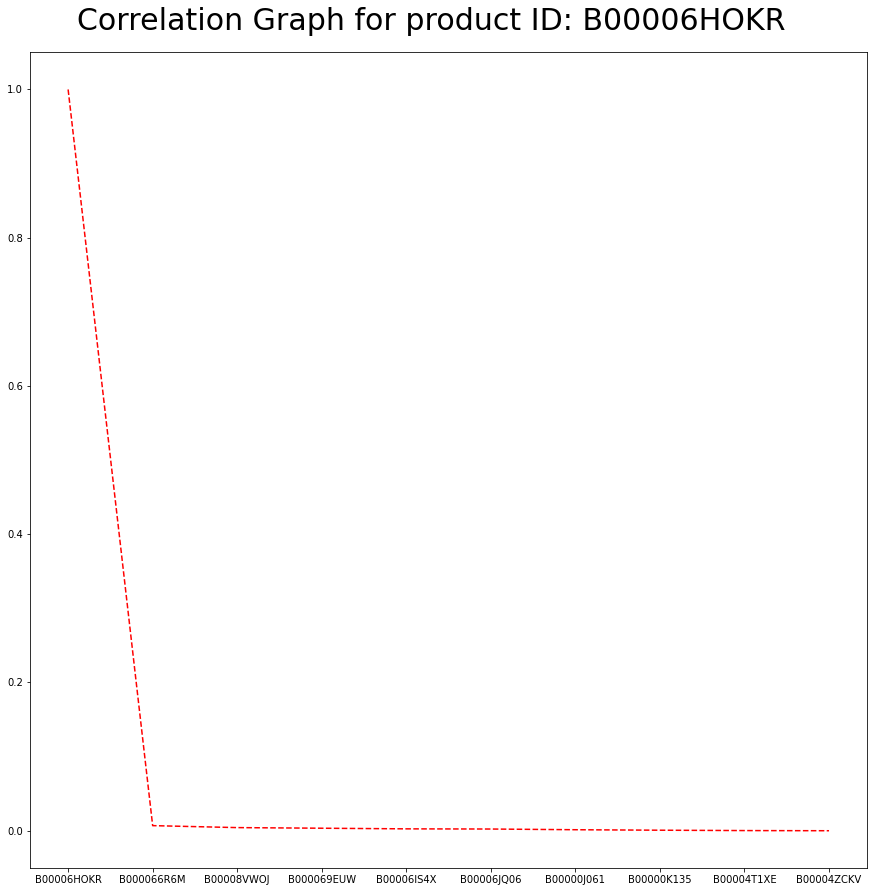

In [15]:
plt.figure(figsize=(15,15))
plt.style.use("seaborn-deep")
plt.text(0.1,1.08,"Correlation Graph for product ID: B00006HOKR", fontsize=30)
plt.plot(a.index, a.correlation ,"r--")
plt.xlabel=("productid")
plt.show()

# Recommendation engine using Knearest machine learning

In [2]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors   #unsupervised ml algorithm
from sklearn.metrics.pairwise import cosine_similarity

In [41]:
pv_t = pv.T
pv_t.head()

UserID,A00625243BI8W1SSZNLMD,A00988692Q9ZDJUD8BQSM,A00995931BE16NG4F52QC,A01035471LBTPFWCOKAU2,A014623426J5CM7M12MBW,A01852072Z7B68UHLI5UG,A02459613IS599WTHNWWS,A02850745KLGY02ZALLI,A0293130VTX2ZXA70JQS,A030530627MK66BD8V4LN,...,AZZD30PYJVGI7,AZZF28AU48P18,AZZFCZRH7GP7H,AZZH379R4HG52,AZZI4GIB6M3E6,AZZNHVT9AH73R,AZZOFVMQC0BJG,AZZP8BC9WE0N8,AZZQFCVCFE8HL,AZZYWDOD33FFE
ProductID,,,,,,,,,,,,,,,,,,,,,
0972683275,0,0,0,0,0,0,0,0,5,4,...,0,0,0,0,0,0,0,0,0,0
1400501466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400532655,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140053271X,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00000DM9W,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
data_array = csr_matrix(pv_t.values)
data_array

<161x94200 sparse matrix of type '<class 'numpy.int64'>'
	with 100000 stored elements in Compressed Sparse Row format>

In [19]:
product = "B00006HOKR"  #product selected to find recommendation
product_index = [i for i,x in enumerate(pv_t.index) if x==product]
product_index

[102]

In [20]:
model = NearestNeighbors(metric="cosine" ,algorithm="brute")
model.fit(data_array)

NearestNeighbors(algorithm='brute', metric='cosine')

In [32]:
distances, indices =model.kneighbors(pv_t.loc[product].values.reshape(1,-1) ,n_neighbors=5)

In [70]:
ind_flat = indices.flatten()[::-1]
dist_flat = distances.flatten()[::-1]
print(f"Top 4 recommended products for {product}:")
for i in range(len(ind_flat)):
    print(f"{i} : {pv_t.index[ind_flat[i]]} ,distances:{dist_flat[i]}")

Top 4 recommended products for B00006HOKR:
0 : B000069EUW ,distances:0.9934669869622231
1 : B00008VWOJ ,distances:0.9927924130112205
2 : B00006JQ06 ,distances:0.992427322313472
3 : B000066R6M ,distances:0.9891469744981191
4 : B00006HOKR ,distances:0.0


Using a Grid search cv to find optimum parameters

In [1]:
from sklearn.model_selection import GridSearchCV

In [12]:
model_knn = NearestNeighbors()

params = {
    "metrics" : ["cosine","Minkowski"], 
    "algorithm" : ["KDtree" ,"BallTree" ,"brute"],
    "radius" : [0.1,0.5,1,5,10,50],
    "p" : [2]
}

# Association Rule Mining

In [52]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [47]:
pv.head(20)

ProductID,0972683275,1400501466,1400532655,140053271X,B00000DM9W,B00000J061,B00000J1V5,B00000JDF5,B00000JI4F,B00000K135,...,B000092YQW,B000093UDQ,B000094Q77,B000095SB4,B000095SB6,B000097O5F,B00009EHJV,B00009KH63,B00009LI55,B00009R6TA
UserID,,,,,,,,,,,,,,,,,,,,,
A00625243BI8W1SSZNLMD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A00988692Q9ZDJUD8BQSM,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A00995931BE16NG4F52QC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A01035471LBTPFWCOKAU2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A014623426J5CM7M12MBW,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A01852072Z7B68UHLI5UG,0,0,0,0,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A02459613IS599WTHNWWS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A02850745KLGY02ZALLI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0293130VTX2ZXA70JQS,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
pv_basket = pv.applymap(lambda x:1 if x>=1 else 0)

In [50]:
pv_basket.head(20)

ProductID,0972683275,1400501466,1400532655,140053271X,B00000DM9W,B00000J061,B00000J1V5,B00000JDF5,B00000JI4F,B00000K135,...,B000092YQW,B000093UDQ,B000094Q77,B000095SB4,B000095SB6,B000097O5F,B00009EHJV,B00009KH63,B00009LI55,B00009R6TA
UserID,,,,,,,,,,,,,,,,,,,,,
A00625243BI8W1SSZNLMD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A00988692Q9ZDJUD8BQSM,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A00995931BE16NG4F52QC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A01035471LBTPFWCOKAU2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A014623426J5CM7M12MBW,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A01852072Z7B68UHLI5UG,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A02459613IS599WTHNWWS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A02850745KLGY02ZALLI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0293130VTX2ZXA70JQS,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
frequent_item = apriori(pv_basket,min_support=0.01,use_colnames=True)
frequent_item.

,support,itemsets
0,0.011157,(0972683275)
1,0.022028,(B00001P4ZH)
2,0.016837,(B00001WRSJ)
3,0.010934,(B00004SABB)
4,0.010679,(B00004SB92)
5,0.017962,(B00004T8R2)
6,0.027038,(B00004ZCJE)
7,0.010775,(B00005ATMB)
8,0.011752,(B00005LEN4)
9,0.013758,(B00005N6KG)


In [84]:
rules = association_rules(frequent_item, metric="lift",min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
